In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
with open('summary_new/subsampling_beta_delta.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
#df.dtypes
#df1 = df.loc[df['optimization'] == 'weighted-ERM']


measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result_beta = df.groupby(['optimization', 'setup', 'SNR',  'nodes'], as_index=False).agg(agg_dict)

In [2]:
with open('summary_new/subsampling_sigma.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
#df.dtypes
#df1 = df.loc[df['optimization'] == 'weighted-ERM']


measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result_sigma = df.groupby(['optimization', 'setup', 'SNR',  'nodes'], as_index=False).agg(agg_dict)

In [3]:
with open('summary_new/subsampling_pi.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
#df.dtypes
#df1 = df.loc[df['optimization'] == 'weighted-ERM']


measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result_pi = df.groupby(['optimization', 'setup', 'SNR',  'nodes'], as_index=False).agg(agg_dict)


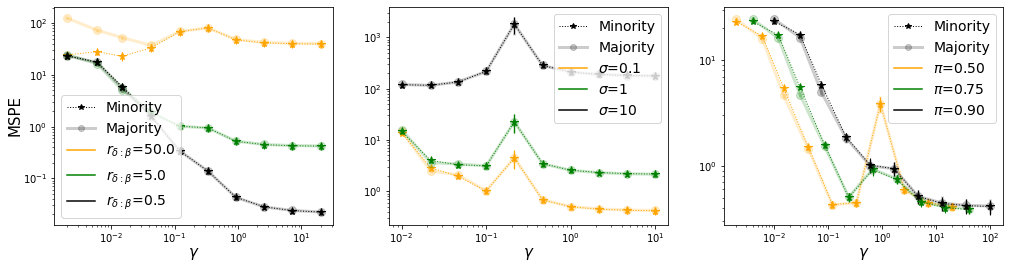

In [4]:
xlabelsize = 15
legendsize = 14
ylabelsize = 15
xlabelspace = 0.5
ylabelspace = 0.5


SNRs = [ 0.1,  1, 10]
colors = ['orange', 'green', 'black']#, 'black']
ltys = ['-', '--', '-.']#,  ':']
lws = [3, 2, 1]
alphas = [0.2, 0.5, 1]
add_on = 4 ** np.array(range(6))
opts = ['ERM', 'weighted-ERM']
names = ['$\\beta_{1} = \\beta + \\delta$, $\\beta_{-1} = \\beta - \\delta$',\
     '$\\beta_{1} = \\beta$, $\\beta_{-1} = \\beta + \\delta$']
names_op = ['ERM', 'weighted-ERM']


result_diff = result_beta.loc[result_beta['setup']=='diff-core']

result_setup = result_diff.loc[result_diff['optimization']=='ERM']

fig, ax = plt.subplots(1, 3, figsize = (17, 4))

for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    result1 = result_setup.loc[result_setup['SNR']==SNR]
    nodes, mean_minor, std_minor = result1['nodes'],\
            result1['minority-mse']['mean'], result1['minority-mse']['std']

    mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
    mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
    ax[0].errorbar(nodes/1000, mean_minor, std_minor, color = c, linestyle = ':',\
             marker = '*', markersize = 8, lw = 1, alpha = 1)
    ax[0].errorbar(nodes/1000 , mean_major, std_major, color = c, linestyle = '-',\
         marker = 'o', markersize = 8, lw = 3, alpha = 0.2)
        #ax[s].errorbar(nodes * (1.4), mean_tr, std_tr, color = 'g', linestyle = lty, marker = 'x',\
         #markersize = 8, lw = lw, alpha = alpha)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_xlabel('$\\gamma$', fontsize = xlabelsize, labelpad = xlabelspace)
    ax[0].set_ylabel('MSPE', fontsize = ylabelsize, labelpad = ylabelspace)
    #plt.title(name, fontsize = 15)
        #ax[s].set_ylim(0, 20)
        
    
lines = [Line2D([0], [0], color='k', linestyle=':', marker='*', lw = 1, alpha = 1), \
    Line2D([0], [0], color='k', linestyle='-', marker='o', lw = 3, alpha = 0.2)]#, \
        #Line2D([0], [0], color='g', linestyle='-', marker='x')\
        #]  
labels = ['Minority', 'Majority']#, 'Balanced Train']
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    lines.append(Line2D([0], [0], color=c))
    labels.append('$r_{\\delta:\\beta}$='+f'{5/SNR}')
ax[0].legend(lines, labels, fontsize = legendsize, loc = 'lower left')










SNRs = [ 0.1,  1, 10]
colors = ['orange', 'green', 'black']#, 'black']
ltys = ['-', '--', '-.']#,  ':']
lws = [3, 2, 1]
alphas = [0.2, 0.5, 1]
add_on = 4 ** np.array(range(6))
#setups = ['same-core-over-envs', 'different-core-over-envs']
setups = ['same-core', 'diff-core']
opts = ['ERM', 'weighted-ERM']
names = ['$\\beta_{1} = \\beta + \\delta$, $\\beta_{-1} = \\beta - \\delta$',\
     '$\\beta_{1} = \\beta$, $\\beta_{-1} = \\beta + \\delta$']
names_op = ['ERM', 'weighted-ERM']


result_diff = result_sigma.loc[result_sigma['setup']=='diff-core']

result_setup = result_diff.loc[result_diff['optimization']=='ERM']
    
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    result1 = result_setup.loc[result_setup['SNR']==SNR]
    nodes, mean_minor, std_minor = result1['nodes'],\
            result1['minority-mse']['mean'], result1['minority-mse']['std']

    mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
    mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
    ax[1].errorbar(nodes/1000, mean_minor, std_minor, color = c, linestyle = ':',\
             marker = '*', markersize = 8, lw = 1, alpha = 1)
    ax[1].errorbar(nodes/1000 , mean_major, std_major, color = c, linestyle = '-',\
         marker = 'o', markersize = 8, lw = 3, alpha = 0.2)
        #ax[s].errorbar(nodes * (1.4), mean_tr, std_tr, color = 'g', linestyle = lty, marker = 'x',\
         #markersize = 8, lw = lw, alpha = alpha)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel('$\\gamma$', fontsize = xlabelsize, labelpad = xlabelspace)
#ax[1].set_ylabel('MSPE', fontsize = 12)
    #plt.title(name, fontsize = 15)
#ax[s].set_xlim(0, 20)
        
    
lines = [Line2D([0], [0], color='k', linestyle=':', marker='*', lw = 1, alpha = 1), \
    Line2D([0], [0], color='k', linestyle='-', marker='o', lw = 3, alpha = 0.2)]#, \
        #Line2D([0], [0], color='g', linestyle='-', marker='x')\
        #]  
labels = ['Minority', 'Majority']#, 'Balanced Train']
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    lines.append(Line2D([0], [0], color=c))
    labels.append(f'$\\sigma$={SNR}')
ax[1].legend(lines, labels, fontsize = legendsize, loc = 'upper right')





SNRs = [ 0.5,  0.7500000000000002, 0.9000000000000004]
colors = ['orange', 'green', 'black']#, 'black']
ltys = ['-', '--', '-.']#,  ':']
lws = [3, 2, 1]
alphas = [0.2, 0.5, 1]
add_on = 4 ** np.array(range(6))
#setups = ['same-core-over-envs', 'different-core-over-envs']
setups = ['same-core', 'diff-core']
opts = ['ERM', 'weighted-ERM']
names = ['$\\beta_{1} = \\beta + \\delta$, $\\beta_{-1} = \\beta - \\delta$',\
     '$\\beta_{1} = \\beta$, $\\beta_{-1} = \\beta + \\delta$']
names_op = ['ERM', 'weighted-ERM']


result_diff = result_pi.loc[result_pi['setup']=='diff-core']

result_setup = result_diff.loc[result_diff['optimization']=='ERM']
pic = 2   
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    result1 = result_setup.loc[result_setup['SNR']==SNR]
    nodes, mean_minor, std_minor = result1['nodes'],\
            result1['minority-mse']['mean'], result1['minority-mse']['std']

    mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
    mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    x = nodes/(1000 * 2 * (1 - SNR))
    ax[pic].errorbar(x, mean_minor, std_minor, color = c, linestyle = ':',\
             marker = '*', markersize = 8, lw = 1, alpha = 1)
    ax[pic].errorbar(x , mean_major, std_major, color = c, linestyle = '-',\
         marker = 'o', markersize = 8, lw = 3, alpha = 0.2)
        #ax[s].errorbar(nodes * (1.4), mean_tr, std_tr, color = 'g', linestyle = lty, marker = 'x',\
         #markersize = 8, lw = lw, alpha = alpha)
ax[pic].set_yscale('log')
ax[pic].set_xscale('log')
ax[pic].set_xlabel('$\\gamma$', fontsize = xlabelsize,labelpad = xlabelspace)
#ax[pic].set_ylabel('MSPE', fontsize = 12)
    #plt.title(name, fontsize = 15)
        #ax[s].set_ylim(0, 20)
        
    
lines = [Line2D([0], [0], color='k', linestyle=':', marker='*', lw = 1, alpha = 1), \
    Line2D([0], [0], color='k', linestyle='-', marker='o', lw = 3, alpha = 0.2)]#, \
        #Line2D([0], [0], color='g', linestyle='-', marker='x')\
        #]  
labels = ['Minority', 'Majority']#, 'Balanced Train']
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    lines.append(Line2D([0], [0], color=c))
    labels.append(f'$\\pi$={SNR:.2f}')
ax[pic].legend(lines, labels, fontsize = legendsize, loc = 'upper right')

plt.savefig('pdf_plots/Sim_NN_subsampling.pdf', bbox_inches = 'tight')